# 데이터 불균형과 다양한 지도학습 학습기(Estimator) 살펴보기

In [1]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

['Malgun Gothic']


## 데이터 준비
- scikit learn 내장 데이터셋 사용

sklearn.dataset 에서 제공해주는 다양한 샘플 데이터 활용  
[참고 : sklearn.datasets 참고](https://scikit-learn.org/stable/api/sklearn.datasets.html#module-sklearn.datasets)

### iris 데이터셋 
꽃 종류 분류하기  
[iris 데이터셋 설명](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

In [3]:
# iris 데이터셋 로드
iris = load_iris()

**iris feature 설명**
* `DESCR`: 데이터셋의 정보를 보여줍니다.
* `data`: feature data.
* `feature_names`: feature data의 컬럼 이름
* `target`: label data (수치형)
* `target_names`: label의 이름 (문자형)

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
data = iris['data']
data[-5:]

array([[6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [6]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

* **sepal**: 꽃 받침
* **petal**: 꽃잎

In [7]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [8]:
# 타겟 값의 레이블(이름)
iris['target_names']   

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 데이터프레임 만들기

### feature들로 구성된 데이터 프레임 만들기


In [9]:
df_iris = pd.DataFrame(data, columns=feature_names)

In [10]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### df_iris 데이터 프레임에 target 컬럼 추가하기

In [11]:
df_iris['target'] = target

In [12]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### EDA & 시각화

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

### 꽃받침 정보에 따른 분류

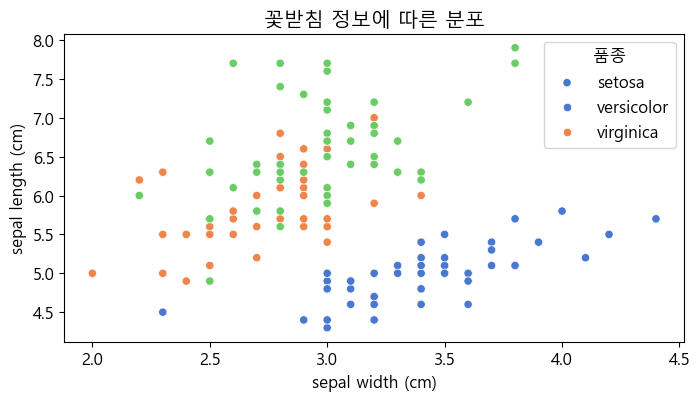

In [14]:
#sns.scatterplot(data=df_iris, x='sepal width (cm)', y='sepal length (cm)', hue='target')
#sns.scatterplot(data=df_iris, x='sepal width (cm)', y='sepal length (cm)', hue='target', palette='brg')
sns.scatterplot(data=df_iris, x='sepal width (cm)', y='sepal length (cm)', hue='target', palette='muted')
plt.legend(title='품종', loc='upper right', labels=iris.target_names)
plt.title('꽃받침 정보에 따른 분포')
plt.show()
#'petal length (cm)', 'petal width (cm)',

### 꽃잎 정보에 따른 분포 살펴보기

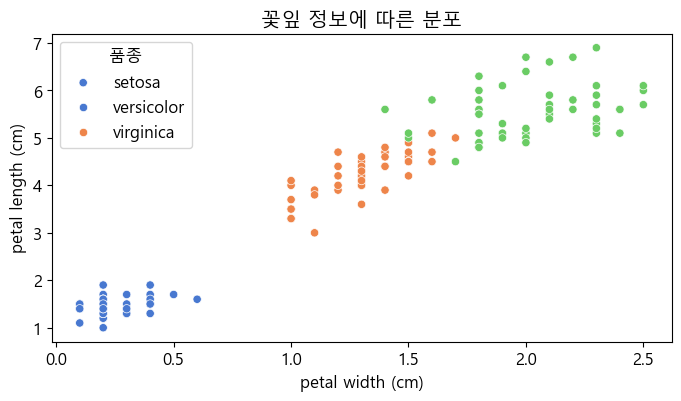

In [15]:
sns.scatterplot(data=df_iris, x='petal width (cm)', y='petal length (cm)', hue='target', palette='muted')
plt.legend(title='품종', loc='upper left', labels=iris.target_names)
plt.title('꽃잎 정보에 따른 분포')
plt.show()

## 학습, 테스트 데이터 분할

### 클래스 분포 불균형 분할

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df_iris.drop('target', axis=1)

In [18]:
y = df_iris['target']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [20]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [21]:
X_test.shape, y_test.shape

((38, 4), (38,))

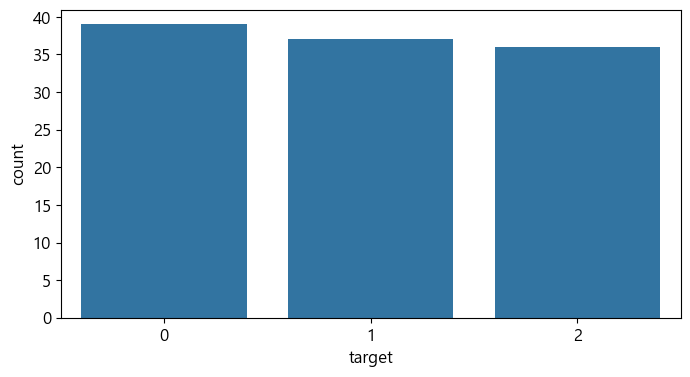

In [22]:
sns.countplot(x= y_train)
plt.show()

### 클래스 분포 균등 분할

label의 클래스의 분포를 균등하게 배분함.
샘플을 균등하게 하지 않으면 편향된 예측을 할 수 있음.  
- stratify = 컬럼명
- 예) target(label) column


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)

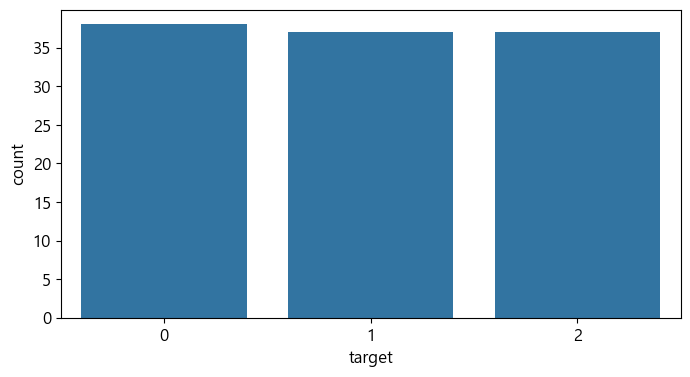

In [24]:
sns.countplot(x = y_train)
plt.show()

In [25]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [26]:
X_test.shape, y_test.shape

((38, 4), (38,))

In [27]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

# 지도학습 알고리즘 이해 및 실습

## 의사 결정 나무 (Decision Tree)
- 스무고개 처럼 질문에 True or False로 판별하여, 바이너리 트리 형태로 가지치기를 하여 결정함  
- 데이터 균일도에 따른 규칙기반 결정으로 다음 노드 결정  
 

### 장점 
- 매우 쉽고, 유연함.
- 데이터 스케일링이나 정규화등의 사전 가공의 영향이 매우 적음.  

### 단점
- depth가 깊어지면 과적합(overfitting)에 빠질 수 있음.

앙상블에서 결정트리의 단점을 보완하여 약한 학습기로 가중치를 계속 업데이터하면서 예측성능을 향상시킬 수 학습기로 사용함.   
[Decision Tree scikit-learning 문서 참조](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/CART_tree_titanic_survivors_KOR.png/350px-CART_tree_titanic_survivors_KOR.png">

### step1 모델 선언

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
model_dtc = DecisionTreeClassifier(random_state=0)
model_dtc

DecisionTreeClassifier(random_state=0)

### step2 모델 학습

In [30]:
model_dtc.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

### step3 test데이터로 예측

In [31]:
y_pred = model_dtc.predict(X_test)
y_pred

array([1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 2,
       0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2])

### step4 모델 성능 평가

In [32]:
from sklearn.metrics import classification_report, accuracy_score

In [33]:
y_pred[:5]

array([1, 1, 2, 2, 2])

In [34]:
y_test[:5].values

array([1, 1, 2, 2, 2])

In [35]:
accuracy_score(y_test, y_pred)

0.9736842105263158

In [36]:
# Predict를 수행하고 classification_report() 결과 출력
y_pred = model_dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



### 결정트리 시각화(Decision Tree Graph display)

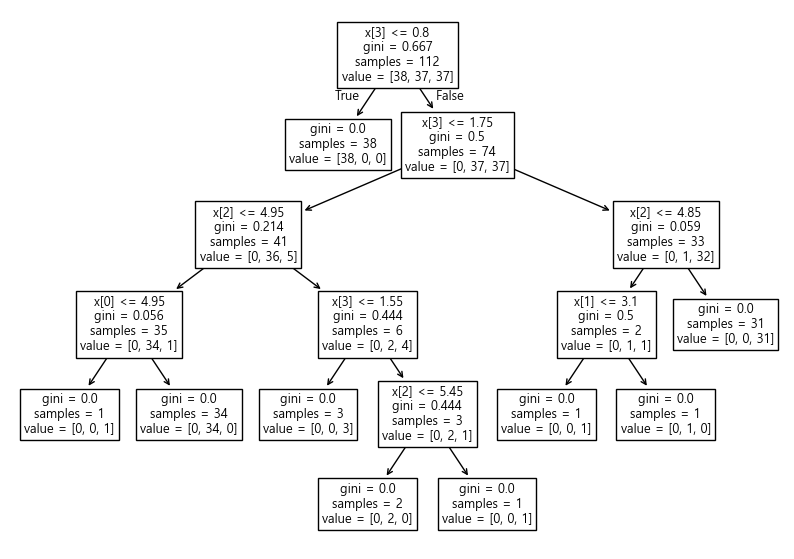

In [37]:
import matplotlib.pyplot as plt
# DT 시각화 함수
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 7))

# plot_tree(DT 학습모델)
plot_tree(model_dtc)
plt.show()

- 다양한 시각화 옵션

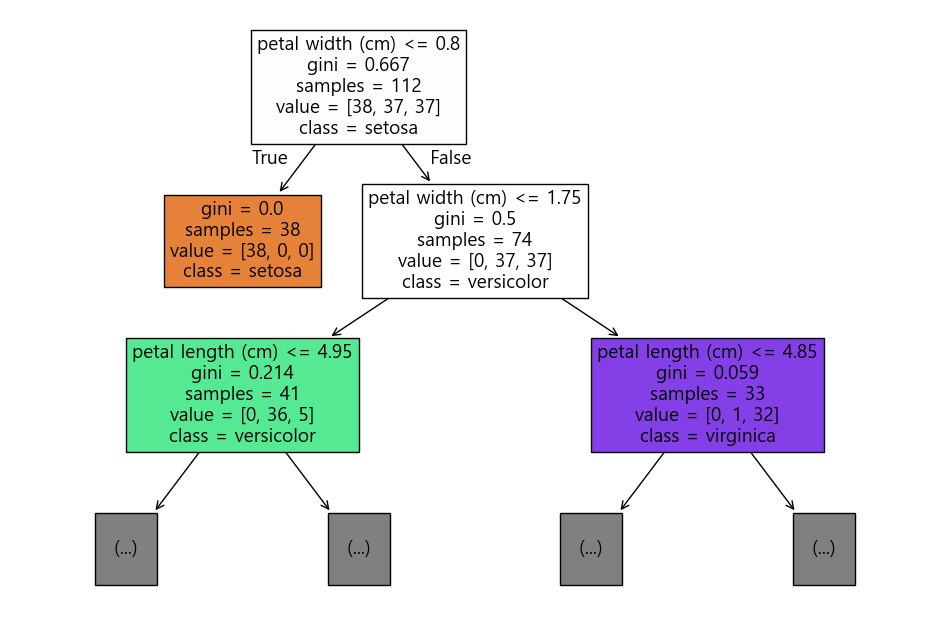

In [38]:
plt.figure(figsize=(12,8))
# plot_tree(model_dtc, max_depth=2, filled=True, feature_names=feature_names)
# plot_tree(model_dtc, max_depth=2, filled=True, class_names=iris['target_names'])
plot_tree(model_dtc, max_depth=2, filled=True, feature_names=feature_names, class_names=iris['target_names'])
plt.show()

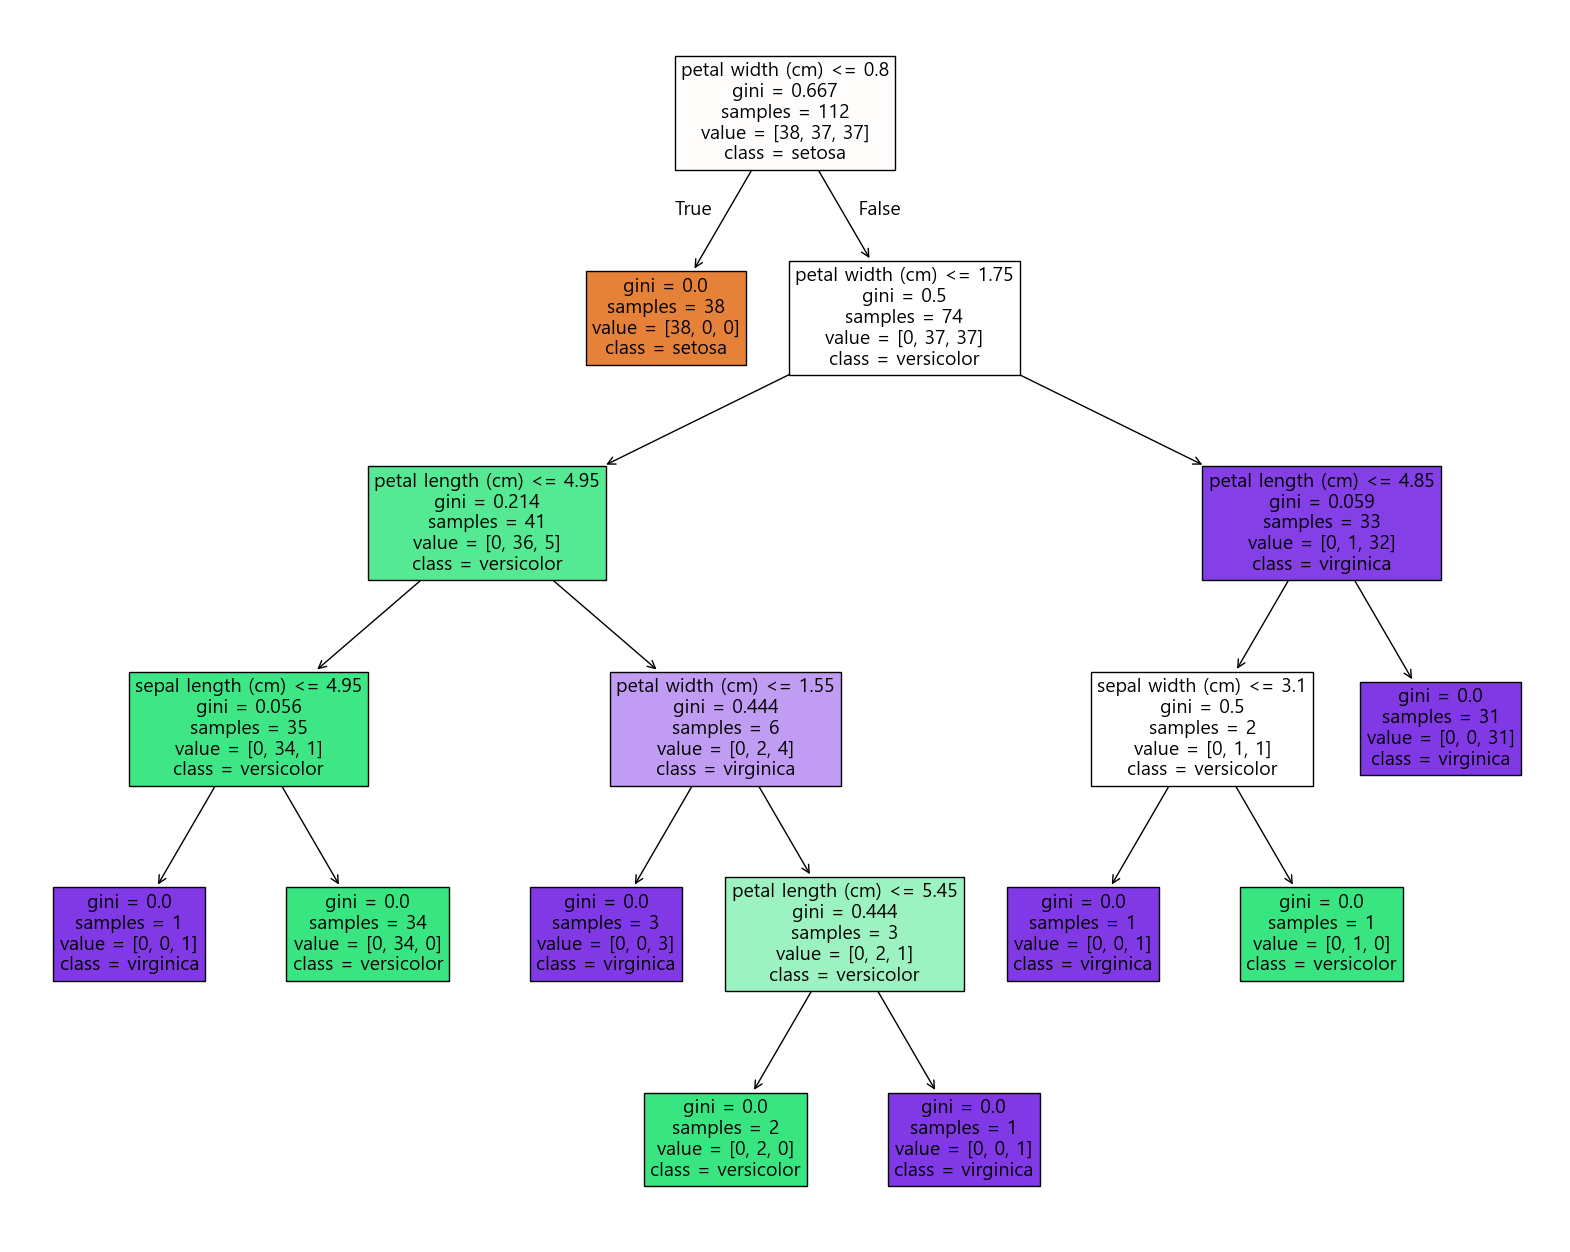

In [39]:
plt.figure(figsize=(20,16))
plot_tree(model_dtc, filled=True, feature_names=feature_names, class_names=iris['target_names'])
plt.show()

- gini계수: 불순도를 의미함. 
- gini 계수가 낮을 수록 균일도가 높음.(비슷한 클래스끼리 모여있다고 해석할 수 있음)

<Axes: >

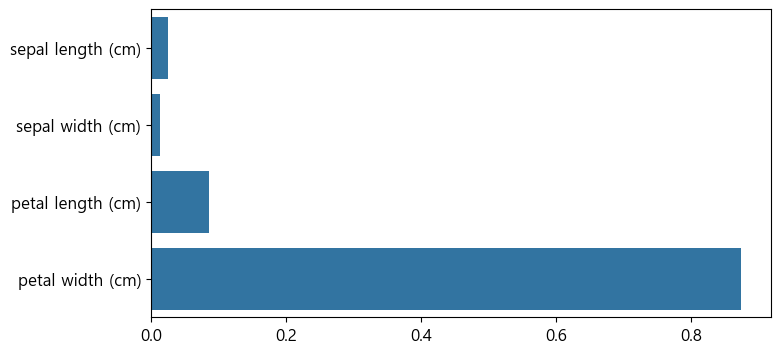

In [40]:
# 분류에 영향을 가장 많이 준 feature
sns.barplot(x=model_dtc.feature_importances_, y=iris.feature_names)

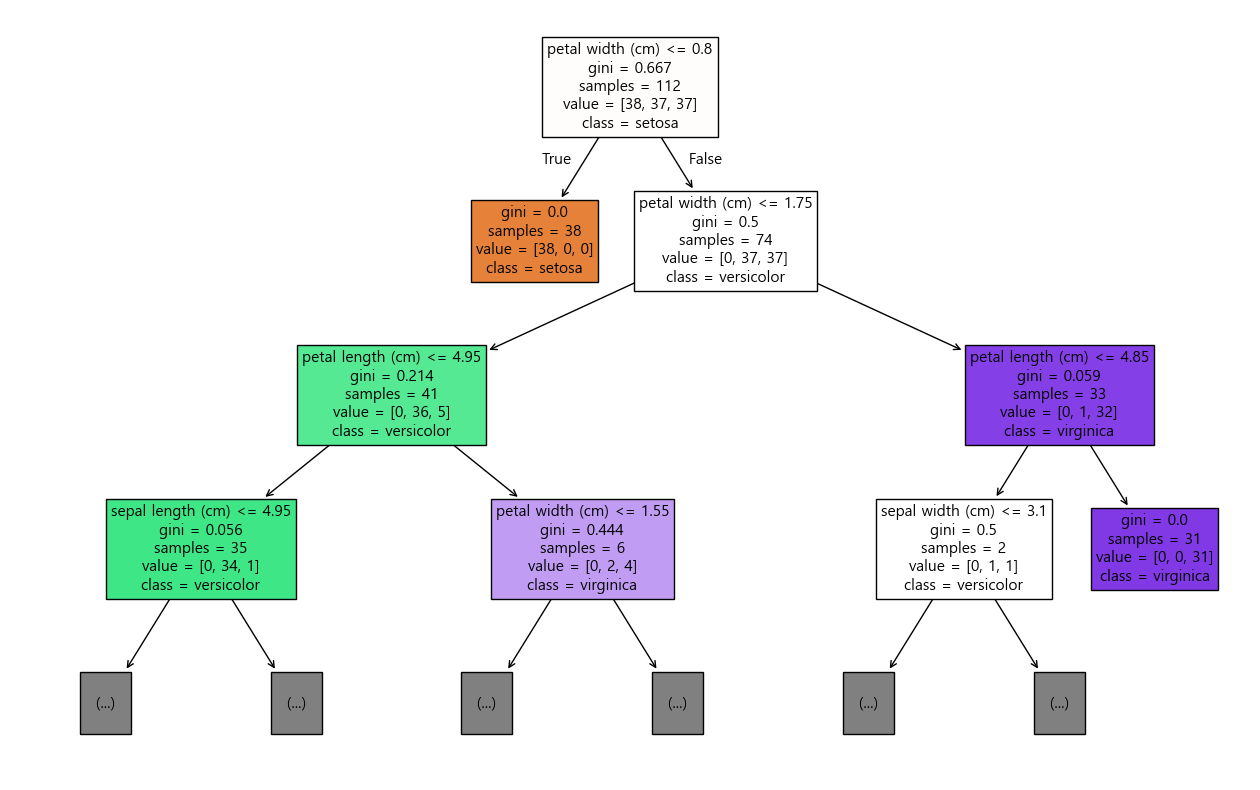

In [41]:
# max_depth=3으로 설정
plt.figure(figsize=(16,10))
plot_tree(model_dtc, max_depth=3, filled=True, feature_names=feature_names, class_names=iris['target_names'])
plt.show()

<Axes: >

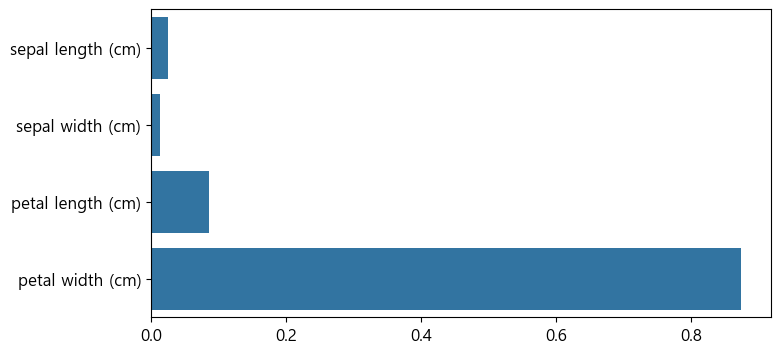

In [42]:
sns.barplot(x=model_dtc.feature_importances_, y=iris.feature_names)

### [문제해결] decision tree로 다음의 하이퍼 파리미터 설정하고 학습 후 성능비교
- min_samples_split=4
- min_samples_leaf=4
- max_depth = ?

In [43]:
# 모델 만들고, 테스트, 성능평가
model_dtc = DecisionTreeClassifier(random_state=0, min_samples_leaf=4)
model_dtc.fit(X_train, y_train)
y_pred = model_dtc.predict(X_test)
y_pred = model_dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



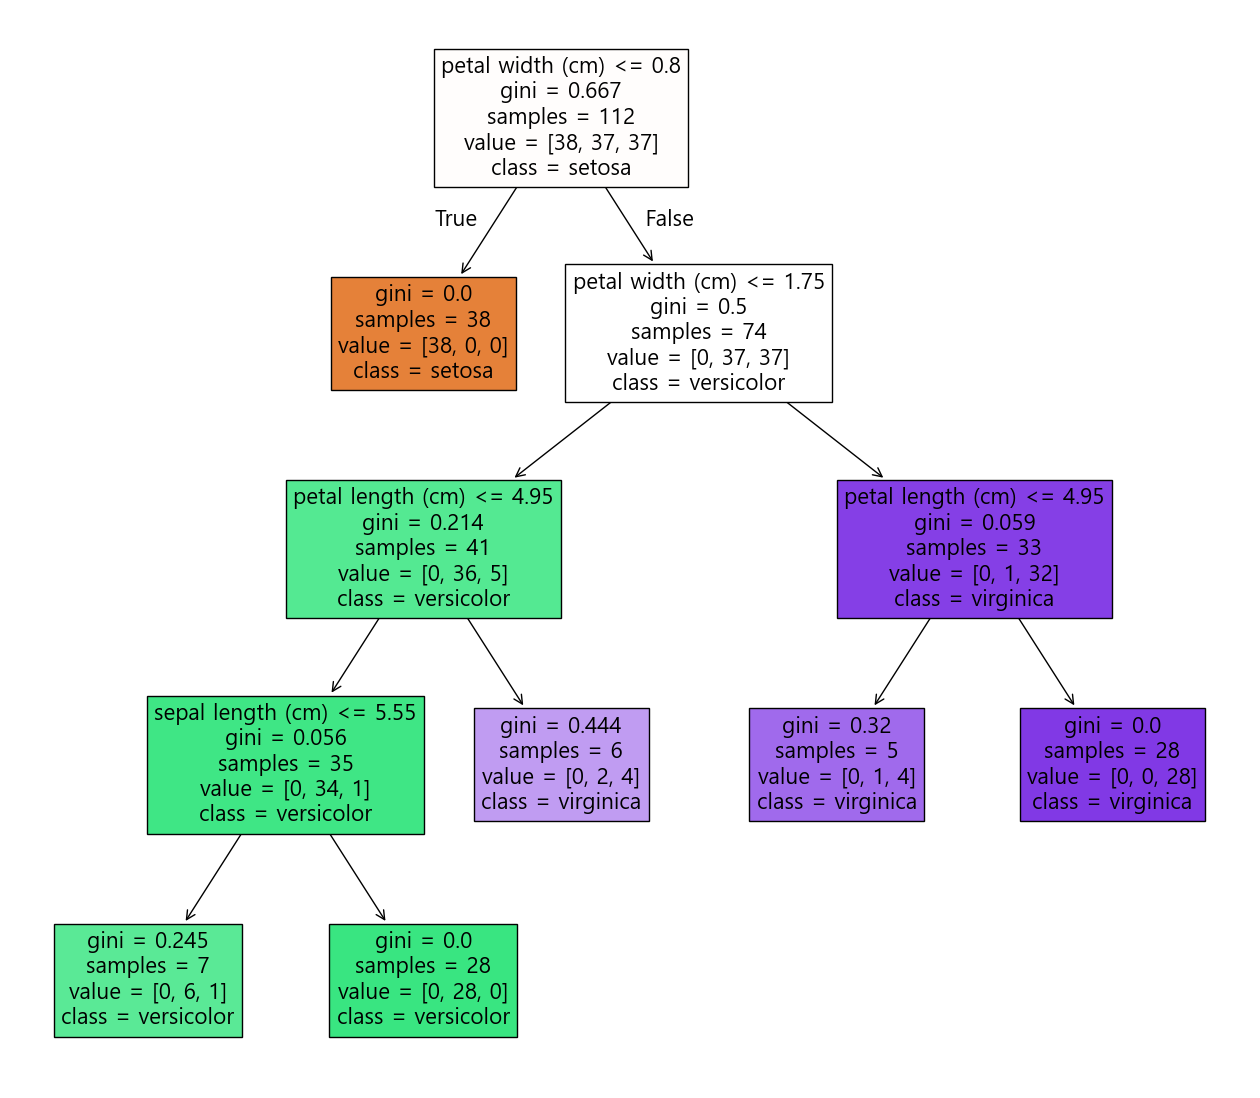

In [44]:
# max_depth=3까지 보기
plt.figure(figsize=(16,14))
#plot_tree(model_dtc, max_depth=3, filled=True, feature_names=feature_names, class_names=iris['target_names'])
plot_tree(model_dtc, filled=True, feature_names=feature_names, class_names=iris['target_names'])
plt.show()

## Logistic Regression

[Logistic Regression scikit-learning 문서 참고](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)

* 로지스틱 회귀(영어: logistic regression)는 영국의 통계학자인 D. R. Cox가 1958년에 제안한 확률 모델
* 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법

<img src="https://t1.daumcdn.net/cfile/tistory/99F325485C7B76BC2B">

- LogisticRegression, 서포트 벡터 머신 (SVM) 과 같은 알고리즘은 이진 분류에서 많이 사용함

### step1 모델 선언

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
# model_lr = LogisticRegression(max_iter=500)
# multi_class : 'auto', 'ovr', 'multinomial'
# model_lr = LogisticRegression(max_iter=500, multi_class='multinomial', solver='lbfgs', )
model_lr = LogisticRegression(max_iter=500, multi_class='auto', solver='lbfgs')

### step2 모델 학습

In [47]:
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=500, multi_class='auto')

### step3 test데이터로 예측

In [48]:
pred_lr = model_lr.predict(X_test)

In [49]:
pred_lr[:5]

array([1, 1, 2, 2, 2])

In [50]:
y_test[:5]

74     1
90     1
146    2
125    2
144    2
Name: target, dtype: int64

### step4 모델 성능 평가

In [51]:
from sklearn.metrics import classification_report, accuracy_score

In [52]:
accuracy_score(y_test, pred_lr)

1.0

In [53]:

# Predict를 수행하고 classification_report() 결과 출력
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [54]:
# 공식문서 예제
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.predict(X_test[:4]))
print(clf.predict_proba(X_test[:4]))  # 확률값
print(clf.score(X_test, y_test))  # 정확도

[1 1 2 2]
[[9.93211818e-03 9.28915699e-01 6.11521833e-02]
 [1.61043643e-02 8.50960976e-01 1.32934660e-01]
 [4.96308950e-04 2.95715738e-01 7.03787953e-01]
 [1.14014284e-05 7.42411181e-02 9.25747480e-01]]
1.0


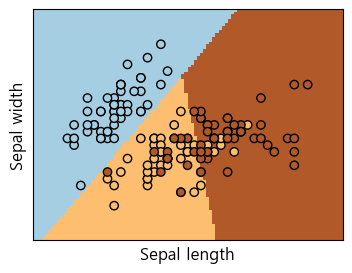

In [55]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
# 정규화는 머신러닝 모델이 **과적합(Overfitting)**되는 것을 방지하기 위한 기법
# C : 정규화 강도 - L2 정규화, 값이 작을 수록 패널티가 커져서 가중치가 작아짐
# C=0.000002 <- 더 강한 정규화
# logreg = LogisticRegression(C=0.000002, max_iter=500, multi_class='auto', solver='lbfgs') 
# C=100000 <- 약한 패널티
logreg = LogisticRegression(C=100000, max_iter=500, multi_class='auto', solver='lbfgs')
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.xticks(())
plt.yticks(())
plt.show()

## SGDClassifier
stochastic gradient descent (SGD) : 확률적 경사 하강법  
[SGDClassifier scikit-learn 문서 참고](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

<img src="https://machinelearningnotepad.files.wordpress.com/2018/04/yk1mk.png"  width=500px >

### step1 모델 선언

In [56]:
from sklearn.linear_model import SGDClassifier

In [57]:
model_sgd = SGDClassifier()

### step2 모델 학습

In [58]:
model_sgd.fit(X_train, y_train)

SGDClassifier()

### step3 test데이터로 예측

In [59]:
pred_sgd = model_sgd.predict(X_test)
pred_sgd

array([1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 0, 1, 0, 0, 2, 2,
       0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2])

### step4 모델 성능 평가

In [60]:
from sklearn.metrics import classification_report, accuracy_score

In [61]:
accuracy_score(y_test, pred_sgd)

0.868421052631579

In [62]:
# Predict를 수행하고 classification_report() 결과 출력
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.62      0.76        13
           2       0.76      1.00      0.87        13

    accuracy                           0.87        38
   macro avg       0.90      0.87      0.86        38
weighted avg       0.90      0.87      0.86        38



### 하이퍼 파라미터 (hyper-parameter) 튜닝
알고리즘 마다 hyper-parameter의 종류가 조금씩 다름.

문서를 보고 적절한 가설을 세운 다음 적용하면서 적합한 옵션과 값을 찾아야함.  
자동으로 찾는 방법은 나중에 학습 예정
- penalty : overfitting을 방지하기 위한 옵션(l1, l2, elasticnet)
- random_state : 하이퍼 파라미터 튜닝시, 고정할 것  
- n_jobs=-1 : CPU가 여러개 일경우 모두 사용 (학습속도가 빠름)
  
[hyper-parameter 튜닝 참조](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [63]:
#model_sgd = SGDClassifier(penalty='elasticnet', random_state=20, n_jobs=-1) #규제 : overfit 방지하는 옵션
# model_sgd = SGDClassifier(penalty='l2', random_state=20, n_jobs=-1) #규제 : overfit 방지하는 옵션
model_sgd = SGDClassifier(penalty='l1', random_state=20, n_jobs=-1) #규제 : overfit 방지하는 옵션
model_sgd

SGDClassifier(n_jobs=-1, penalty='l1', random_state=20)

In [64]:
model_sgd.fit(X_train, y_train)

SGDClassifier(n_jobs=-1, penalty='l1', random_state=20)

In [65]:
pred_sgd = model_sgd.predict(X_test)

In [66]:
pred_sgd[:10]

array([1, 1, 2, 2, 2, 1, 0, 2, 2, 0])

In [67]:
from sklearn.metrics import classification_report, accuracy_score

In [68]:
accuracy_score(y_test, pred_sgd)

0.9736842105263158

In [69]:
# Predict를 수행하고 classification_report() 결과 출력
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



## KNeighborsClassifier
최근접 이웃 알고리즘

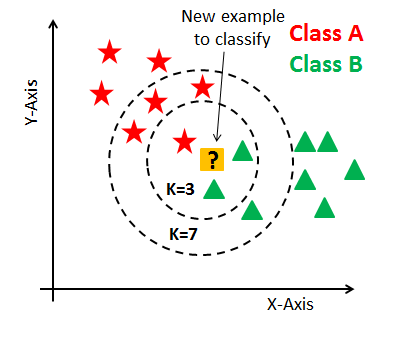

In [70]:
from IPython.display import Image
# 출처: 데이터 캠프
Image('https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png')

### step1 모델 선언

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
model_knc = KNeighborsClassifier()
model_knc  # n_neighbors=5 일반적으로 홀수 값으로 설정

KNeighborsClassifier()

### step2 모델 학습

In [73]:
model_knc.fit(X_train, y_train)

KNeighborsClassifier()

### step3 test데이터로 예측

In [74]:
pred_knc = model_knc.predict(X_test)

### step4 모델 성능 평가

In [75]:
from sklearn.metrics import classification_report, accuracy_score

In [76]:
accuracy_score(y_test, pred_knc)

1.0

In [77]:
# Predict를 수행하고 classification_report() 결과 출력
print(classification_report(y_test, pred_knc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



hyper-parameter 튜닝해서 실습해 보기

In [78]:
model_knc = KNeighborsClassifier(n_neighbors=7, leaf_size=20)
model_knc.fit(X_train, y_train)
pred_knc = model_knc.predict(X_test)
print(y_test)
print(pred_knc)

74     1
90     1
146    2
125    2
144    2
55     1
49     0
117    2
130    2
47     0
63     1
94     1
57     1
91     1
0      0
141    2
25     0
65     1
44     0
29     0
126    2
143    2
9      0
93     1
132    2
28     0
148    2
116    2
54     1
112    2
16     0
8      0
15     0
84     1
99     1
98     1
36     0
142    2
Name: target, dtype: int64
[1 1 2 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 1 1 1 0
 2]


In [79]:
accuracy_score(y_test, pred_knc)

1.0

## 서포트 벡터 머신 (SVM; Support Vector Machine)
- (SVC; Support Vector Classifier)
- 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만듦.
- 경계로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘.

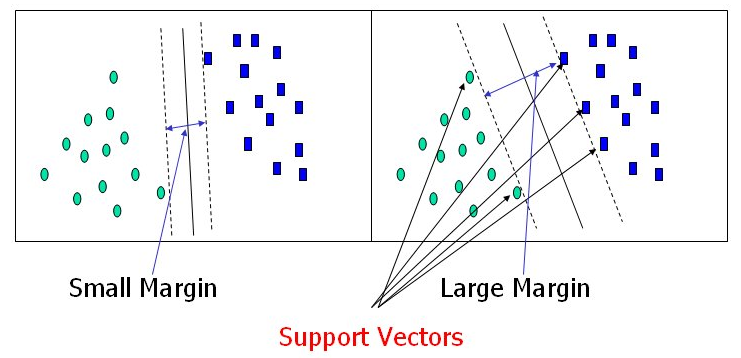

In [80]:
from IPython.display import Image
Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')

기본 원리는 이진 분류를 위해 고안됐지만 다중분류 가능함.
- 기본 OvR, OvO 전략을 사용해 다중분류 문제도 해결 가능
    - OvR : 다중 클래스 문제의 클래스 개수(K개)만큼의 이진 분류기,
        - 예측 시에는 K개의 분류기가 각각 점수를 계산하고, 가장 높은 점수를 받은 클래스로 최종 예측
    - OvO : 가능한 모든 두 클래스 쌍에 대해 이진 분류기를 만듭니다. 클래스가 K개일 경우 총 K * (K-1) / 2 개의 분류기가 필요
        - 예측 시에는 모든 분류기가 해당 샘플을 각자의 기준에 따라 분류하고, 가장 많은 분류기에게 선택(투표)받은 클래스를 최종 예측으로 결정

- hyperparameter 옵션
    - [SVM scikit-learn 문서 참조](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

### step1 모델 선언

In [81]:
from sklearn.svm import SVC

In [82]:
model_svc = SVC(kernel="linear", C=10)
model_svc

SVC(C=10, kernel='linear')

### step2 모델 학습

In [83]:
model_svc.fit(X_train, y_train)

SVC(C=10, kernel='linear')

### step3 test 데이터로 예측

In [84]:
pred_svc = model_svc.predict(X_test)

In [85]:
pred_svc

array([1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 2, 2,
       0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2])

### step4 모델 성능 평가

In [86]:
from sklearn.metrics import classification_report, accuracy_score

In [87]:
accuracy_score(y_test, pred_svc)

1.0

In [88]:
pred_svc[:5]

array([1, 1, 2, 2, 2])

각 클래스(target 값)에 대한 확률값을 return 해주는 decision_function()

In [89]:
# 클래스를 분류한 확률 정보 확인
model_svc.decision_function(X_test)[:5]

array([[-0.23926426,  2.28023685,  0.75592725],
       [-0.23873309,  2.25788457,  0.84262294],
       [-0.2664893 ,  1.18041355,  2.24577395],
       [-0.27962692,  1.18000795,  2.26709796],
       [-0.27749846,  0.83443234,  2.28541916]])

In [90]:
# Predict를 수행하고 classification_report() 결과 출력
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



  SVC 학습모델의 속성값
  - n_support_: 각 클래스의 서포트의 개수
  - coef_: kernel='linear'를 사용했을 경우의 기울기(w 벡터)
  - intercept_: w0(편향 bias)

In [91]:
model_svc.coef_

array([[-0.27649744,  0.32258035, -0.82949233, -0.23041454],
       [-0.00670256,  0.17874017, -0.53862696, -0.29182761],
       [ 1.55739604,  1.167956  , -3.37646981, -3.2198546 ]])

In [92]:
model_svc.intercept_

array([2.87096492, 1.50601791, 8.79861243])